In [8]:
information_gain(4, 3, 2, 1, 2, 2)

0.9649839288804954


0.020244207153756077

In [6]:
import math
import math

def entropy(p_plus, p_minus):
    # Calculate entropy
    total = p_plus + p_minus
    if p_plus == 0 or p_minus == 0:
        return 0  # Entropy is 0 if one class is pure
    entropy = -((p_plus / total) * math.log2(p_plus / total) + (p_minus / total) * math.log2(p_minus / total))
    return entropy

def conditional_entropy(p_plus_A, p_minus_A, p_plus_B, p_minus_B):
    # Calculate conditional entropy
    total_A = p_plus_A + p_minus_A
    total_B = p_plus_B + p_minus_B

    conditional_entropy_A = (total_A / (total_A + total_B)) * entropy(p_plus_A, p_minus_A)
    conditional_entropy_B = (total_B / (total_A + total_B)) * entropy(p_plus_B, p_minus_B)

    conditional_entropy = conditional_entropy_A + conditional_entropy_B
    return conditional_entropy

def information_gain(p_plus_Y, p_minus_Y, p_plus_A, p_minus_A, p_plus_B, p_minus_B):
    # Calculate information gain
    H_Y = entropy(p_plus_Y, p_minus_Y)
    H_Y_A = conditional_entropy(p_plus_A, p_minus_A, p_plus_B, p_minus_B)
    print(H_Y_A)

    info_gain = H_Y - H_Y_A
    return info_gain

# Example usage:
p_plus_Y = 4  # Number of positive examples in Y
p_minus_Y = 3  # Number of negative examples in Y

p_plus_A = 3  # Number of positive examples when A=1
p_minus_A = 1  # Number of negative examples when A=1

p_plus_B = 1  # Number of positive examples when B=1
p_minus_B = 1  # Number of negative examples when B=1

# Calculate entropy, conditional entropy, and information gain
H_Y = entropy(p_plus_Y, p_minus_Y)
H_Y_A = conditional_entropy(p_plus_A, p_minus_A, p_plus_B, p_minus_B)
IG_A = information_gain(p_plus_Y, p_minus_Y, p_plus_A, p_minus_A, p_plus_B, p_minus_B)

print(f"Entropy (H(Y)): {H_Y:.2f}")
print(f"Conditional Entropy (H(Y | A, B)): {H_Y_A:.2f}")
print(f"Information Gain (IG(A, B)): {IG_A:.2f}")


0.8741854163060885
Entropy (H(Y)): 0.99
Conditional Entropy (H(Y | A, B)): 0.87
Information Gain (IG(A, B)): 0.11


In [ ]:
!pip install backtesting

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for backtesting: filename=Backtesting-0.3.3-py3-none-any.whl size=173796 sha256=8e7adb0146c569e0b03be06d1cc1f4325ca108ed4eacf44571e20027da06dbdf
  Stored in directory: /root/.cache/pip/wheels/e2/30/7f/19cbe31987c6ebdb47f1f510343249066711609e3da2d57176
Successfully built backtesting


In [ ]:
import numpy as np
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas as pd

In [ ]:
df = pd.read_csv("EURUSD_Candlestick_5_M_ASK_30.09.2019-30.09.2022.csv")
df["Gmt time"]=df["Gmt time"].str.replace(".000","")
df['Gmt time']=pd.to_datetime(df['Gmt time'],format='%d.%m.%Y %H:%M:%S')
df.set_index("Gmt time", inplace=True)

<ipython-input-35-ba4df4729bb2>:2: FutureWarning:

The default value of regex will change from True to False in a future version.



In [ ]:
yf.pdr_override()
# df = pdr.get_data_yahoo("AAPL", start="2015-01-01", end="2023-05-07")
# df = pdr.get_data_yahoo("EURUSD=X", start="2023-07-14", end="2023-08-15",interval = "15m")

# Feature Extraction Functions

In [ ]:
def get_reversal(points,rate = 0,min_period = 0):
  change = 0
  reversal_1 = 0
  reversal_2 = 0
  reversal_1_index = 0
  reversal_2_index = 0
  mins = []
  maxs = []
  mins_rates = []
  maxs_rates = []
  last = "none"
  last_index = 0
  if len(points) > 1:
    for i in range(1,len(points)-1):
          old_change = change
          if points[i+1] >  points[i]:
            change = 1
          elif points[i+1] <  points[i]:
            change = -1
          if old_change != change:
            if reversal_1 == 0:
                reversal_1 = points[i]
                reversal_1_index = i
            else:
                reversal_2 = points[i]
                reversal_2_index = i
                r = (reversal_2 - reversal_1) / reversal_1
                if abs(r) >= rate:
                  if change == 1:
                    if last == "none" or last == "min":
                      if i - last_index > min_period:
                        maxs.append(reversal_1_index)
                        maxs_rates.append(r*100)
                        last = "max"
                        last_index = i
                  else:
                    if last == "none" or last == "max":
                      if i - last_index > min_period:
                        mins.append(reversal_1_index)
                        mins_rates.append(r*100)
                        last = "min"
                        last_index = i
                reversal_1 = reversal_2
                reversal_1_index = reversal_2_index
    if change == 1:
          mins.append(len(points)-2)
    else:
          maxs.append(len(points)-2)
  return mins, maxs, mins_rates, maxs_rates

def get_mins(poitns,maxs):
    mins = []
    for i in range(len(maxs)):
      if i == 0:
          start = 0
          end = maxs[i]
      else:
          start = maxs[i-1]
          end = maxs[i]

      idxmin_loc = poitns.iloc[start+1:end].idxmin()
      idx_loc = poitns.index.get_loc(idxmin_loc)
      mins.append(idx_loc)
    return mins

def get_reversal_rates(points,maxs,mins):
   indexes = mins + maxs
   indexes.sort()
   change_rates = []
   for i in range(1, len(indexes)):
      prev_index = indexes[i-1]
      curr_index = indexes[i]
      prev_val = points[prev_index]
      curr_val = points[curr_index]
      change_rate = (curr_val - prev_val) / prev_val * 100
      change_rates.append(change_rate)
   return change_rates


def add_reversal(df,points,mins, maxs):
  df["Reversal"] = 0
  df["Reversal"][mins] = 1
  df["Reversal"][maxs] = 2
  df["Reversal_rate"] = 0
  l = mins+maxs
  l.sort()
  df["Reversal_rate"].iloc[l[:-1]] =  get_reversal_rates(points,maxs,mins)
  df["next_Reversal"] = df["Reversal"].shift(-1, axis = 0).fillna(0)

def add_major_trend(df,mins,maxs):
  df['Major_trend'] = 0
  idx_list = mins + maxs
  idx_list.sort()
  if min(mins) < min(maxs):
    trend = -1
  else:
    trend = 1
  for i in range(len(idx_list)):
      if i == 0:
          start = 0
          end = idx_list[i]
      else:
          start = idx_list[i-1]
          end = idx_list[i]
      df.loc[start:end,'Major_trend'] = trend
      trend *= -1
  df.loc[idx_list[-1]:,'Major_trend'] = trend

def add_minor_trend(df,mins,maxs):
  df['Minor_trend'] = 0
  idx_list = mins + maxs
  idx_list.sort()
  if min(mins) < min(maxs):
    trend = -1
  else:
    trend = 1
  for i in range(len(idx_list)):
      if i == 0:
          start = 0
          end = idx_list[i]
      else:
          start = idx_list[i-1]
          end = idx_list[i]
      df.loc[start:end,'Minor_trend'] = trend
      trend *= -1
  df.loc[idx_list[-1]:,'Minor_trend'] = trend

def add_trend_age(df,mins,maxs):
  idx_list = mins + maxs
  idx_list.sort()
  ret = []
  minus = 0
  for i in range(len(df)):
    if i-1 in idx_list:
      minus = i
    ret.append(i-minus+1)
  df["trend_age"] = ret



In [ ]:
# Support Resistance
def isFarFromLevel(l,s,levels):
   return np.sum([abs(l-x) < s  for x in levels.Value.values]) == 0

def get_levels(max_maxs, min_mins, high_points,low_points,df):
  lvls = pd.DataFrame(columns = ['Start', 'Value'])
  s =  np.mean(df['High'] - df['Low'])
  indexes = max_maxs+min_mins
  indexes.sort()
  for i in indexes:
    if i in max_maxs:
      l = high_points[i]
      if isFarFromLevel(l,s,lvls):
          lvls.loc[len(lvls)] = [high_points.index[i], l]
    if i in min_mins:
      l = low_points[i]
      if isFarFromLevel(l,s,lvls):
          lvls.loc[len(lvls)] = [high_points.index[i], l]
  lvls = lvls.sort_values("Start").reset_index(drop = True)
  return lvls

lvls_features = ["age",'last_MReversal','nCandle','nCandleTime','nReversal','nMReversal','nReversalClose',"nReversalOpen","nReversalHigh","nReversalLow","nMReversalClose","nMReversalOpen","nMReversalHigh","nMReversalLow"]
def levels_propreties(df,lvls,analysis,current,reversal_dict):
    cut_lvls = lvls[lvls["Start"] < current]
    current_candle = df[df.index == current]
    for i in range(cut_lvls.shape[0]):
      l = cut_lvls.Value[i]
      s = cut_lvls.Start[i]
      analysis_index = analysis[analysis.Lvl == l].index
      # age
      age = (current - s).days
      analysis.loc[analysis_index,'age'] = age
      # last Mreversal age update
      analysis.loc[analysis_index,'last_MReversal'] += 1
      # nCandles
      zone = df.avg_candle[current] / 3
      touching = ((current_candle.Low - l < 0) & (current_candle.High - l > 0)) | ((current_candle.Low - l < zone) & (current_candle.Low - l > 0)) | ((l - current_candle.High < zone) & (current_candle.High - l < 0))
      touching = touching[touching.index[0]]
      if touching:
         analysis.loc[analysis_index,'nCandle'] += 1
         # last_MReversal
         if df[df.index == current].Reversal.iloc[0] == 1:
            analysis.loc[analysis_index,'last_MReversal'] = 0
         # nCandlesTime
         nCandle = analysis.loc[analysis_index,'nCandle']
         analysis.loc[analysis_index,'nCandleTime'] = nCandle / age
         # nReversal and nMreversal
         added = False
         Madded = False
         for ohlc_key in reversal_dict:
           for reversal_key in reversal_dict[ohlc_key]:
             if current in reversal_dict[ohlc_key][reversal_key]:
                analysis.loc[analysis_index,f"n{reversal_key}{ohlc_key}"] += 1
                if reversal_key == "Reversal":
                  if not added:
                    analysis.loc[analysis_index,"nReversal"] += 1
                    added = True
                else:
                  if not Madded:
                    analysis.loc[analysis_index,"nMReversal"] += 1
                    Madded = True
    return analysis

def add_SR(df):
   df["High-below"] = 0
   df["Low-below"] = 0
   df["Close-below"] = 0
   df["Open-below"] = 0
   df["Min-below"] = 0
   df["Max-below"] = 0
   df["above-High"] = 0
   df["above-Low"] = 0
   df["above-Close"] = 0
   df["above-Open"] = 0
   df["above-Min"] = 0
   df["above-Max"] = 0
   df['through-High'] = 0
   df['through-Low'] = 0
   df['through-Close'] = 0
   df['through-Open'] = 0
   df["through-Min"] = 0
   df["through-Max"] = 0

   df["no_below"] = 0
   df["no_above"] = 0
   df["no_through"] = 0

   for f in lvls_features:
     df[f"below_{f}"] = 0
     df[f"above_{f}"] = 0
     df[f"through_{f}"] = 0

  #  # number of lvls broken
  #  df["nBreakout"] = 0
  #  # strong level breakout
  #  df["nMBreakout"] = 0

   # get lvls
   high_points = df.High
   low_points = df.Low
   mins, maxs,r,r = get_reversal(high_points)
   max_points = high_points.loc[high_points.index[maxs]]
   max_mins, max_maxs,r,r = get_reversal(max_points)
   max_maxs = [maxs[i] for i in max_maxs]
   min_mins = get_mins(low_points,max_maxs)
   lvls = get_levels(max_maxs,min_mins,high_points,low_points,df)
   # get reversals and Mreversals
   reversal_dict = {"Close": {"Reversal":[],"MReversal":[]},"Open": {"Reversal":[],"MReversal":[]}
              ,"High": {"Reversal":[],"MReversal":[]},"Low": {"Reversal":[],"MReversal":[]}}
   OHLC = [df.Close,df.Open,df.High,df.Low]
   for points,key in zip(OHLC,reversal_dict):
    mins, maxs,r,r = get_reversal(points)
    reversal_dict[key]["Reversal"] = df.index[maxs+mins]
    max_mins, max_maxs,r,r = get_reversal(points.loc[points.index[maxs]])
    max_maxs = [maxs[i] for i in max_maxs]
    min_mins = get_mins(points,max_maxs)
    reversal_dict[key]["MReversal"] = df.index[max_maxs+min_mins]
   # initialize the propreties dataframe
   prop = pd.DataFrame(0, index=np.arange(len(lvls)),columns = ['Lvl','Start']+lvls_features)
   prop["Lvl"] = lvls["Value"]
   prop["Start"] = lvls["Start"]

   for i in range(df.shape[0]):
    current = df.index[i]
    prop = levels_propreties(df, lvls, prop, current,reversal_dict)
    cut_prop = prop[prop["Start"] < current]
    resistances = cut_prop.Lvl[cut_prop.Lvl - df.High[current] >= 0]
    resistance = None
    if len(resistances) > 0:
        resistance = cut_prop.iloc[resistances.idxmin()]
    supports = cut_prop.Lvl[cut_prop.Lvl - df.Low[current] <= 0]
    support = None
    if len(supports) > 0:
        support = cut_prop.iloc[supports.idxmax()]
    throughs = cut_prop.Lvl[(cut_prop.Lvl - df.Low[current] > 0) & (cut_prop.Lvl - df.High[current] < 0)]
    through = None
    if len(throughs) > 0:
        through = cut_prop.iloc[throughs.idxmax()] # i took the max just randomly
    Min = min(df.Open[current],df.Close[current])
    Max = max(df.Open[current],df.Close[current])
    if type(support) != type(None):
        df.loc[current, 'High-below'] = df.High[current] - support.Lvl
        df.loc[current, 'Low-below'] = df.Low[current] - support.Lvl
        df.loc[current, 'Close-below'] = df.Close[current] - support.Lvl
        df.loc[current, 'Open-below'] = df.Open[current] - support.Lvl
        df.loc[current, 'Min-below'] =  Min - support.Lvl
        df.loc[current, 'Max-below'] = Max - support.Lvl

        for val, column in zip(support[2:], support.index[2:]):
            df.loc[current, f'below_{column}'] = val
    else:
        df.loc[current, 'no_below'] = 1
    if type(resistance) != type(None):
        df.loc[current, 'above-High'] = resistance.Lvl - df.High[current]
        df.loc[current, 'above-Low'] = resistance.Lvl - df.Low[current]
        df.loc[current, 'above-Close'] = resistance.Lvl - df.Close[current]
        df.loc[current, 'above-Open'] = resistance.Lvl - df.Open[current]
        df.loc[current, 'above-Min'] = resistance.Lvl - Min
        df.loc[current, 'above-Max'] = resistance.Lvl - Max
        for val, column in zip(resistance[2:], resistance.index[2:]):
            df.loc[current, f'above_{column}'] = val
    else:
        df.loc[current, 'no_above'] = 1
    if type(through) != type(None):
        df.loc[current, 'through-High'] = through.Lvl - df.High[current]
        df.loc[current, 'through-Low'] = through.Lvl - df.Low[current]
        df.loc[current, 'through-Close'] = through.Lvl - df.Close[current]
        df.loc[current, 'through-Open'] = through.Lvl - df.Open[current]
        df.loc[current, 'through-Min'] = through.Lvl - Min
        df.loc[current, 'through-Max'] = through.Lvl - Max
        for val, column in zip(through[2:], through.index[2:]):
            df.loc[current, f'through_{column}'] = val
    else:
        df.loc[current, 'no_through'] = 1

   distances = ["High-below","Low-below","Close-below","Open-below","Min-below","Max-below",
                "above-High","above-Low","above-Close","above-Open","above-Min","above-Max",
                "through-High","through-Low","through-Close","through-Open",'through-Max','through-Min']
   for d in distances:
     df[f"Relative-{d}"] = df[d] / df["avg_candle"]


# Feature Extraction

In [ ]:
df = df.iloc[:10000]

In [ ]:
# adding the reversal, rates, and trend
high_points = df.High
low_points = df.Low
mins, maxs,r,r = get_reversal(high_points)
max_points = high_points.loc[high_points.index[maxs]]
max_mins, max_maxs,r,r = get_reversal(max_points)
max_maxs = [maxs[i] for i in max_maxs]
min_mins = get_mins(low_points,max_maxs)

# mins, maxs,r,r = get_reversal(points)
# max_points = points.loc[points.index[maxs]]
# max_mins, max_maxs,r,r = get_reversal(max_points)
# max_maxs = [maxs[i] for i in max_maxs]
# mins = get_mins(points,max_maxs)
# maxs = max_maxs


# the reversal rate here is not accurate cause it should include low points
add_reversal(df,high_points,min_mins, max_maxs)
add_major_trend(df,min_mins,max_maxs)
add_minor_trend(df,mins,maxs)
add_trend_age(df,min_mins,max_maxs)

# adding avg candle height in the last 7 candles
df["avg_candle"] = df['High'].rolling('7D').mean() - df['Low'].rolling('7D').mean()

# SR
add_SR(df)

<ipython-input-18-61d8a9e6813b>:82: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-61d8a9e6813b>:83: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-61d8a9e6813b>:87: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-61d8a9e6813b>:105: FutureWarning:

Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with pos

In [ ]:
!pip install pandas_ta

In [ ]:
import pandas_ta as ta

lens = [5,7,10,14,20,30,40,50,60,100,150,200,250,300]
for l in lens:
  df[f'sma_{str(l)}'] = ta.sma(df['Close'], length=l)
  df[f'ema_{str(l)}'] = ta.ema(df['Close'], length=l)
  df[f'RSI_{str(l)}']=ta.rsi(df.Close, length=l)

df['obv'] = ta.obv(df['Close'], df['Volume'])
df['atr'] = ta.atr(df['High'], df['Low'], df['Close'])
df["VWAP"]=ta.vwap(df.High, df.Low, df.Close, df.Volume)

my_bbands = ta.bbands(df.Close, length=14, std=2.0)
df=df.join(my_bbands)
df = df.dropna()

candle = ["Open","Low","Close","High"]
for l in lens:
  for c in candle:
    df[f'sma_{str(l)}-{c}'] = df[c] - df[f'sma_{str(l)}']
    df[f'ema_{str(l)}-{c}'] = df[c] - df[f'sma_{str(l)}']
for c in candle:
 df[f"BBL_14_2.0-{c}"] = df[c] - df["BBL_14_2.0"]
 df[f"BBM_14_2.0-{c}"] = df[c] - df["BBM_14_2.0"]
 df[f"BBU_14_2.0-{c}"] = df[c] - df["BBU_14_2.0"]



<ipython-input-38-673ea375bf9e>:20: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-38-673ea375bf9e>:21: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-38-673ea375bf9e>:20: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-38-673ea375bf9e>:21: PerformanceWarning:

# ML

In [ ]:
df = df.drop(columns=['below_nCandleTime',
 'above_nCandleTime',
 'through_nCandleTime'])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.model_selection import train_test_split
import xgboost as xgb

target = "Reversal"
drop = ["next_Reversal","Reversal","Reversal_rate","Major_trend"]
keep = ['no_through','through_age','through_nMReversal',"trend_age"]
train, test = train_test_split(df, test_size=0.3,shuffle=False)

# balacing
# class_counts = train[target].value_counts()
# min_count = class_counts.min()
# class_0_samples = train[train[target] == 0].sample(n=min_count, random_state=42)
# class_1_samples = train[train[target] == 1]
# train = pd.concat([class_0_samples, class_1_samples], axis=0)

# X_train = train.loc[:,keep]
X_train = train.drop(columns = drop)
y_train = train[target]
# X_test = test.loc[:,keep]
X_test = test.drop(columns = drop)
y_test = test[target]

# XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'max_depth': 10000,'eta': 0.5,'gamma': 3,'min_child_weight': 0.2,'subsample': 1,'colsample_bytree': 1, 'lambda': 0.1, 'alpha': 0.1,
          'objective': 'multi:softprob','eval_metric': 'mlogloss','seed': 53,'num_class':3,'tree_method':"gpu_hist" }
model = xgb.train(params, dtrain, 10000)

In [ ]:
y_pred = model.predict(dtest)
# y_pred = model.predict(X_test)

# test["Prediction"] = np.where(y_pred > 0.5, 1,0)
# test["Prediction"] = y_pred
# test["Prediction"] = y_pred.astype(int)
predictions = np.argmax(y_pred, axis=1)
for i in range(len(predictions)):
    if predictions[i] != 0 and y_pred[i, predictions[i]] < 0.8:
        predictions[i] = 0

test["Prediction"] = predictions

In [ ]:
# Plotting SR
fig = go.Figure()

temp_df = test.copy()
temp_df = test.iloc[100:500]
temp_y_pred = y_pred[100:500]

high_points = df.High
low_points = df.Low

# plot candlestick
fig = go.Figure(data=[go.Candlestick(x=temp_df.index,
                open=temp_df['Open'],
                high=temp_df['High'],
                low=temp_df['Low'],
                close=temp_df['Close'])])
fig.update_layout(xaxis_title='Date')

mins, maxs,r,r = get_reversal(high_points)
max_points = high_points.loc[high_points.index[maxs]]
max_mins, max_maxs,r,r = get_reversal(max_points)
max_maxs = [maxs[i] for i in max_maxs]

min_mins = get_mins(low_points,max_maxs)

# plot levels
lvls = get_levels(max_maxs,min_mins,high_points,low_points,df)
lvls["Start"][lvls.Start < temp_df.index[0]] = temp_df.index[0]
lvls = lvls[(lvls.Value > temp_df.Low.min()) & (lvls.Value < temp_df.High.max())]
lvls = lvls[lvls.Start < temp_df.index[-1]]

# for index, row in lvls.iterrows():
#   fig.add_trace(go.Scatter(x=[row["Start"],temp_df.index[-1]], y=[row["Value"],row["Value"]], mode='lines'))

# Add arrows for test["Prediction"] series
prediction_series = temp_df["Prediction"]
# trend_series = temp_df["trend"]
reversal_series = temp_df["Reversal"]

avg_candle_length = temp_df["High"] - temp_df["Low"]
avg_arrow_length = avg_candle_length.mean()

for i in range(len(prediction_series)):
    if prediction_series[i] != 0:
        arrow_color = "green" if prediction_series[i] == 1 else "red"
        fig.add_annotation(x=temp_df.index[i], y=temp_df.High[i], ax=0, ay=-30,
                           showarrow=True, arrowhead=1, arrowcolor=arrow_color)

# for i in range(len(reversal_series)):
#     if reversal_series[i] != 0:
#         color = "blue" if reversal_series[i] == 1 else "orange"
#         fig.add_annotation(x=temp_df.index[i], y=temp_df.High[i], ax=0, ay=-30,
#                            showarrow=True, arrowhead=1, arrowcolor=color)

fig.show()

prediction_np = prediction_series.to_numpy()
signals_indexes = prediction_np.nonzero()
np.max(temp_y_pred[signals_indexes], axis=1)



<ipython-input-66-763c00081228>:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([0.92923534, 0.98089725, 0.8444617 , 0.97889954, 0.9986565 ,
       0.9862839 , 0.95846224, 0.9986565 , 0.9984285 , 0.994719  ,
       0.99701333, 0.9754013 , 0.9866687 , 0.9875767 , 0.8716482 ,
       0.97389185, 0.9917094 ], dtype=float32)

<Axes: >

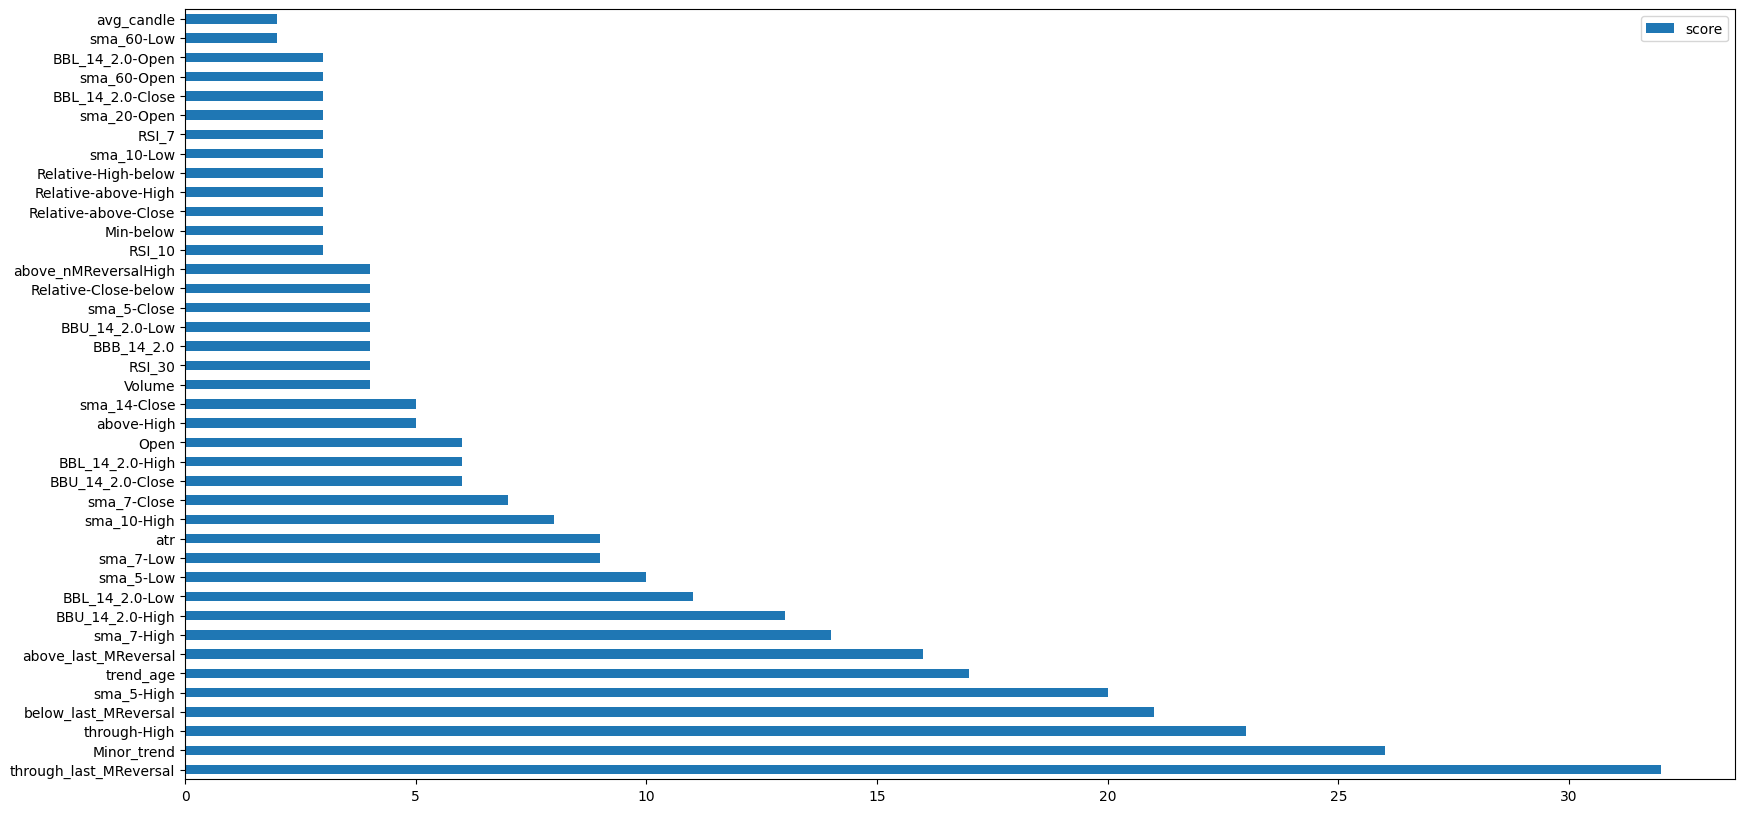

In [ ]:
feature_important = model.get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

# Backtesting

In [ ]:
import pandas as pd

# Assuming your DataFrame is named df
# Create a new daily date range with the same length as the DataFrame
start_date = test.index.min().normalize()
end_date = start_date + pd.DateOffset(days=len(test) - 1)
daily_index = pd.date_range(start=start_date, end=end_date, freq='D')

# Assign the new daily index to your DataFrame
test.index = daily_index

In [ ]:
!pip install bokeh==2.4.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 54.4 MB/s eta 0:00:00
  Attempting uninstall: bokeh
    Found existing installation: bokeh 3.2.2
    Uninstalling bokeh-3.2.2:
      Successfully uninstalled bokeh-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
panel 1.2.1 requires bokeh<3.3.0,>=3.1.1, but you have bokeh 2.4.3 which is incompatible.


In [ ]:
# change backtesting library: no plotting, reversal is not giving 100% winrate, and cannot compound and control when to keep money and when to draw it

from backtesting import Backtest, Strategy

class MLStrategy(Strategy):
    def init(self):
       pass

    def next(self):
        price = self.data.Close[-1]
        reversal = self.data.Prediction[-1]
        # trend = self.data.trend[-1]
        trend = 1
        signal = trend * reversal
        if signal == 1:
            if self.position.is_short:
                self.position.close()
            else:
                self.buy(sl=price*0.9999, tp=price*1.003)
        elif signal == 2:
            if self.position.is_long:
                self.position.close()
            else:
              self.sell(sl=price*1.0001, tp=price*0.997)


bt = Backtest(test, MLStrategy, cash=100000)
output = bt.run()
output
# bt.plot()

Start                     2019-11-01 00:00:00
End                       2027-10-19 00:00:00
Duration                   2909 days 00:00:00
Exposure Time [%]                   82.886598
Equity Final [$]                100644.914768
Equity Peak [$]                 100646.735768
Return [%]                           0.644915
Buy & Hold Return [%]               -0.976458
Return (Ann.) [%]                    0.080664
Volatility (Ann.) [%]                 0.22773
Sharpe Ratio                          0.35421
Sortino Ratio                        0.505502
Calmar Ratio                         0.258836
Max. Drawdown [%]                   -0.311642
Avg. Drawdown [%]                   -0.059026
Max. Drawdown Duration      968 days 00:00:00
Avg. Drawdown Duration       88 days 00:00:00
# Trades                                   40
Win Rate [%]                             12.5
Best Trade [%]                        0.30091
Worst Trade [%]                     -0.011819
Avg. Trade [%]                    

# plotting

In [ ]:
# Plotting SR

temp_df = df.copy()
temp_df = temp_df.iloc[:200]
fig = go.Figure()

high_points = temp_df.High
low_points = temp_df.Low

# plot candlestick
fig = go.Figure(data=[go.Candlestick(x=temp_df.index,
                open=temp_df['Open'],
                high=temp_df['High'],
                low=temp_df['Low'],
                close=temp_df['Close'])])
fig.update_layout(xaxis_title='Date')

mins, maxs,r,r = get_reversal(high_points)
max_points = high_points.loc[high_points.index[maxs]]
max_mins, max_maxs,r,r = get_reversal(max_points)
max_maxs = [maxs[i] for i in max_maxs]
min_mins = get_mins(low_points,max_maxs)

min_points = low_points.loc[low_points.index[mins]]
min_mins1, min_maxs,r,r = get_reversal(min_points)
min_mins1 = [mins[i] for i in min_mins1]

# plot levels
# lvls = get_levels(max_maxs,min_mins,high_points,low_points,temp_df)

# for index, row in lvls.iterrows():
#   fig.add_trace(go.Scatter(x=[row["Start"],temp_df.index[-1]], y=[row["Value"],row["Value"]], mode='lines'))

avg_candle_length = temp_df["High"] - temp_df["Low"]
avg_arrow_length = avg_candle_length.mean()

reversals = [max_maxs,min_mins,maxs,mins,min_mins1]
reversals_names = ["max_maxs","min_mins","maxs","mins","min_mins1"]
colors = ["purple", "yellow","black","orange","blue"]
for reversal_list,color,name in zip(reversals,colors,reversals_names):
  for i in reversal_list:
          y, ay = (temp_df.High[i], -30) if "max" in name else (temp_df.Low[i], 30)
          fig.add_annotation(x=temp_df.index[i], y=y, ax=0, ay=ay,
                            showarrow=True, arrowhead=1, arrowcolor=color)

# for i in max_maxs:
#   fig.add_shape(type="circle",
#                 xref="x", yref="y",
#                 x0=high_points.index[i], y0=high_points[i],
#                 x1=high_points.index[i], y1 =high_points[i]+1,
#                 line=dict(color="purple", width=3))
# for i in min_mins:
#   fig.add_shape(type="circle",
#                 xref="x", yref="y",
#                 x0=low_points.index[i], y0=low_points[i],
#                 x1=low_points.index[i], y1 =low_points[i]-1,
#                 line=dict(color="yellow", width=3))
# for i in maxs:
#   fig.add_shape(type="circle",
#                 xref="x", yref="y",
#                 x0=high_points.index[i], y0=high_points[i],
#                 x1=high_points.index[i], y1 =high_points[i]+0.3,
#                 line=dict(color="black", width=3))
# for i in mins:
#   fig.add_shape(type="circle",
#                 xref="x", yref="y",
#                 x0=low_points.index[i], y0=low_points[i],
#                 x1=low_points.index[i], y1 =low_points[i]-0.3,
#                 line=dict(color="orange", width=3))
# for i in min_mins1:
#   fig.add_shape(type="circle",
#                 xref="x", yref="y",
#                 x0=low_points.index[i], y0=low_points[i]+1,
                # x1=low_points.index[i], y1 =low_points[i],
                # line=dict(color="blue", width=3))

fig.show()